<a href="https://colab.research.google.com/github/Faxriddin80/Faxriddin80/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()



Saving spiderman.jpg to spiderman.jpg


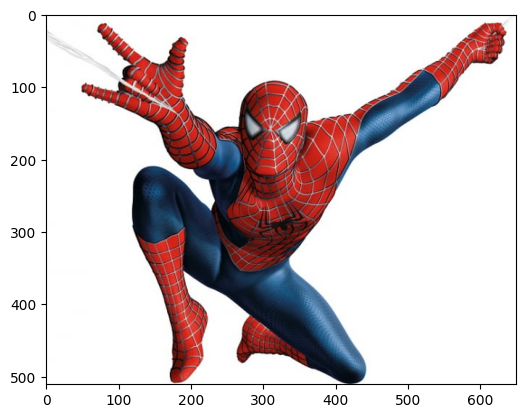

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('spiderman.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()


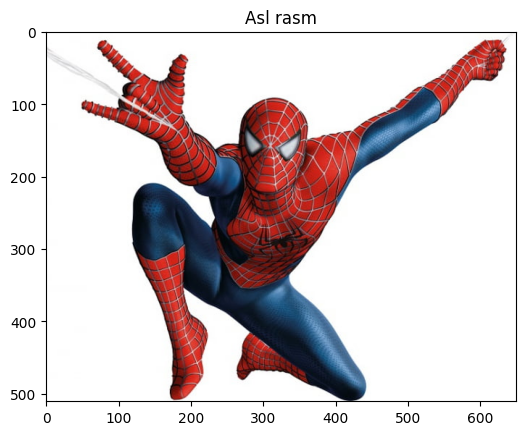

In [6]:
img = cv2.imread('/content/spiderman.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Asl rasm")
plt.show()


In [7]:
(h, w) = img.shape[:2]
center = (w // 2, h // 2)


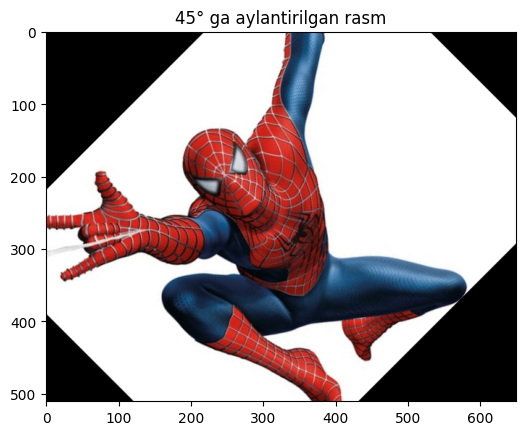

In [8]:
angle = 45
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)
rotated = cv2.warpAffine(img, M, (w, h))

plt.imshow(rotated)
plt.title("45° ga aylantirilgan rasm")
plt.show()


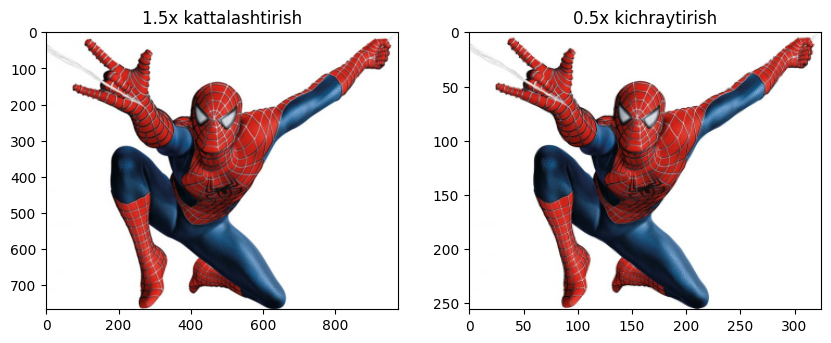

In [9]:
scaled_up = cv2.resize(img, None, fx=1.5, fy=1.5)
scaled_down = cv2.resize(img, None, fx=0.5, fy=0.5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(scaled_up)
plt.title("1.5x kattalashtirish")

plt.subplot(1,2,2)
plt.imshow(scaled_down)
plt.title("0.5x kichraytirish")
plt.show()

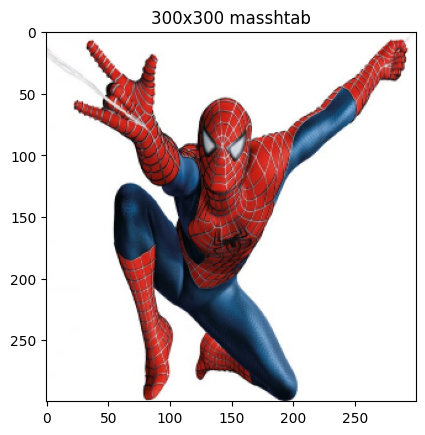

In [10]:
resized = cv2.resize(img, (300, 300))
plt.imshow(resized)
plt.title("300x300 masshtab")
plt.show()


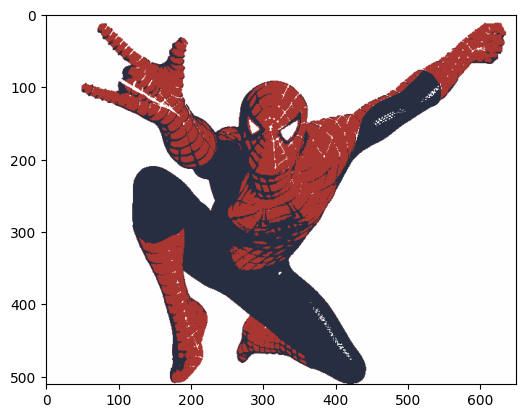

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('spiderman.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Z = img.reshape((-1,3))
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 3
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented = centers[labels.flatten()]
segmented = segmented.reshape(img.shape)

plt.imshow(segmented)

In [13]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

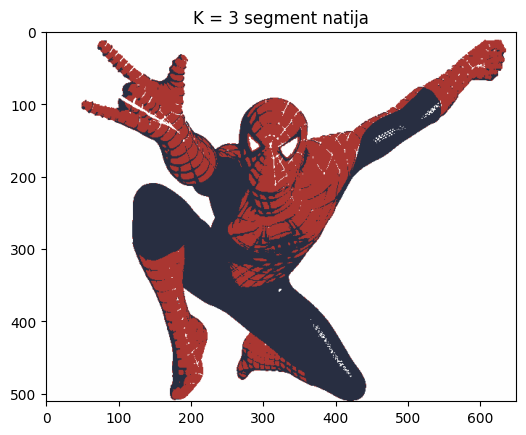

In [14]:
centers = np.uint8(centers)
segmented = centers[labels.flatten()]
segmented = segmented.reshape((img.shape))

plt.imshow(segmented)
plt.title("K = 3 segment natija")
plt.show()

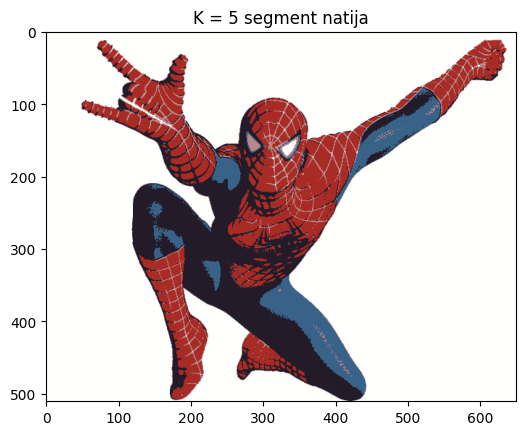

In [15]:
K = 5
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented5 = centers[labels.flatten()]
segmented5 = segmented5.reshape((img.shape))

plt.imshow(segmented5)
plt.title("K = 5 segment natija")
plt.show()